# Bibliotecas Importantes

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# Sobre os dados:

In [2]:
data = pd.read_csv('pesos.csv')
data.head()

,Data,Semana,Peso (kg)
0,05/01/2018,1,108.8
1,12/01/2018,2,107.5
2,20/01/2018,3,107.6
3,26/01/2018,4,107.3
4,03/02/2018,5,106.5


# Limpeza Inicial dos Dados

In [3]:
# Convertendo o índice para o número da semana
data.index = np.arange(1, len(data) + 1)
data = data.drop(['Semana'],axis=1)

In [4]:
# Criando a coluna com a variação de peso ocorrida naquela semana
variacao = data['Peso (kg)'].diff()
data['Variação'] = variacao

In [5]:
# Convertendo dados de 'Data' para datetime
data['Data'] = pd.to_datetime(data['Data'],format='%d/%m/%Y')

# Visão Geral Sobre os Dados

In [6]:
data

,Data,Peso (kg),Variação
1,2018-01-05,108.8,NaN
2,2018-01-12,107.5,-1.3
3,2018-01-20,107.6,0.1
4,2018-01-26,107.3,-0.3
5,2018-02-03,106.5,-0.8
...,...,...,...
107,2020-04-25,79.9,-0.5
108,2020-05-02,79.4,-0.5
109,2020-05-09,78.8,-0.6
110,2020-05-16,77.8,-1.0


In [7]:
data.describe()

,Peso (kg),Variação
count,111.000000,110.0000
mean,92.783333,-0.2800
std,7.183027,0.6484
min,77.800000,-1.7000
25%,88.250000,-0.7375
50%,94.100000,-0.3500
75%,96.950000,0.1875
max,108.800000,1.6000


### Conforme tabela:
    Foram realizadas 111 medições.
    Em média, perdeu-se 0,28kg por semana.
    O maior peso registrado foi 108,8kg, enquanto o menor 77,8kg.
    No intervalo de uma semana, a máxima perda de peso foi de 1,7kg, enquanto que o máximo ganho de 1,6kg.

In [8]:
# Caso a perda de peso fosse linear, ela seria dada pela equação abaixo:
peso_lin = (((78-108.8)/110)*(data.index)) + 109.07272 # y = ax + b

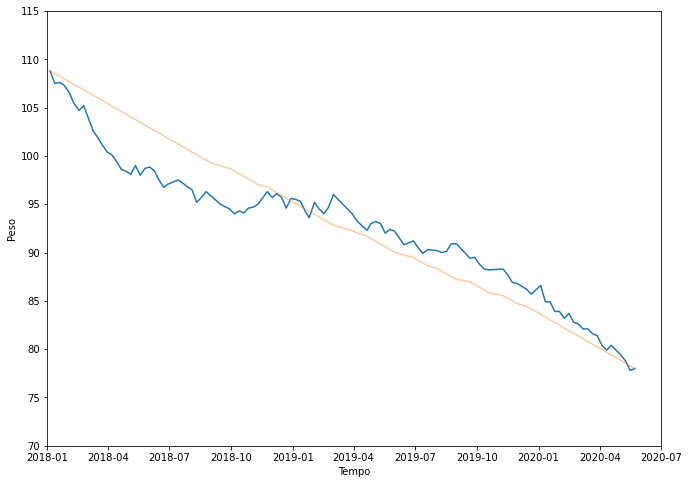

In [9]:
# Registros de pesos no intervalo do experimento é dado pela linha azul.
sns.lineplot(x='Data', y='Peso (kg)',data=data)
sns.lineplot(x=data['Data'],y= peso_lin,data=data, alpha=0.4)
plt.xlabel('Tempo')
plt.ylabel('Peso')
plt.xlim(dt.date(2018, 1, 1),dt.date(2020, 7, 1))
plt.ylim(70,115)
plt.gcf().set_size_inches(11, 8)
plt.show()

Este processo não foi linear. Houveram períodos de intenso emagrecimento, enquanto outros de ganho de peso.
A continuidade foi fundamental. Apesar das variações semanais, a tendência foi de redução de kilos.

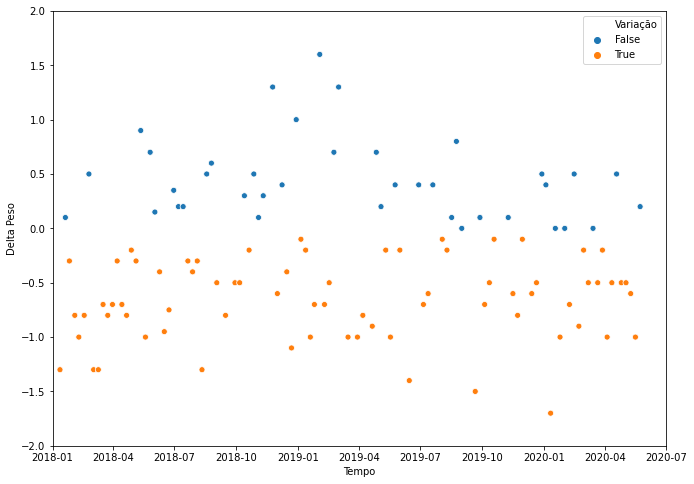

In [10]:
sns.scatterplot(x=data['Data'], y= data['Variação'], hue=data['Variação'] < 0)
plt.xlabel('Tempo')
plt.ylabel('Delta Peso')
plt.xlim(dt.date(2018, 1, 1),dt.date(2020, 7, 1))
plt.ylim(-2,2)
plt.gcf().set_size_inches(11, 8)
plt.show()

True quando houve perda de peso na semana, False caso contrário.
Observa-se uma maior quantidade de ocorrências de variação de peso negativa, o que ajuda a explicar a perda de peso geral.